In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
info_pedidos_df = pd.read_csv('Info_de_Pedidos_18_09_24.csv', encoding='cp1252', sep =';', decimal=',')
display(info_pedidos_df)

,,Pedido Id,Data/Hora,Situação,Situação.1,Situação - Transporte,Marketplace,Forma de Pagamento,Forma de Recebimento,Serviço Transportadora,Valor Produto,Valor Desconto,Valor Acréscimo,Valor Frete,Valor Frete Transportadora,Valor Total,Valor Total Pedido,Loja,Obs.,Origem - Pedido
0,aprovado,1451,18/09/2024 17:12,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,8.9,0.0,0,13.09,8.26,21.99,21.99,1 - Dica de Madame,1.0,Marketplace
1,aprovado,1450,18/09/2024 16:54,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,32.9,0.0,0,26.28,14.10,59.18,59.18,1 - Dica de Madame,1.0,Marketplace
2,aprovado,1449,18/09/2024 16:54,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,43.9,0.0,0,14.60,12.30,58.50,58.50,1 - Dica de Madame,NaN,Marketplace
3,aprovado,1448,18/09/2024 14:36,4,4 - Aprovado,Não Enviado,26 - Amazon,NaN,33 - Amazon,41 - J&T Express - J&T Express,19.9,0.0,0,19.33,15.70,39.23,39.23,1 - Dica de Madame,NaN,Marketplace
4,aguardando-pagamento,1447,18/09/2024 13:46,1,1 - Aguardando Pagamento,Não Enviado,1 - Lojas Americanas,1 - Boleto Bancário,3 - B2W,14 - PAC - B2W Entregas,41.8,0.0,0,27.99,27.99,69.79,69.79,1 - Dica de Madame,NaN,Marketplace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,transporte,670,15/08/2024 14:01,7,7 - Transporte,Não Enviado,41 - Shopee,NaN,63 - Shopee,40 - Shopee Entregas - Shopee Entregas,57.9,14.0,0,10.10,25.00,43.90,43.90,1 - Dica de Madame,NaN,Marketplace
764,pagamento-cancelado,669,15/08/2024 11:42,2,2 - Cancelado Pagamento,Não Enviado,41 - Shopee,1 - Boleto Bancário,63 - Shopee,40 - Shopee Entregas - Shopee Entregas,129.8,31.0,0,28.30,25.00,98.80,98.80,1 - Dica de Madame,NaN,Marketplace
765,pagamento-cancelado,668,15/08/2024 10:42,2,2 - Cancelado Pagamento,Não Enviado,41 - Shopee,NaN,63 - Shopee,40 - Shopee Entregas - Shopee Entregas,71.9,17.0,0,5.48,25.00,54.90,54.90,1 - Dica de Madame,NaN,Marketplace
766,entregue,667,15/08/2024 07:33,8,8 - Entregue,Entregue,NaN,2 - Cartão - MasterCard,64 - MagaPay (Asaas),41 - J&T Express - J&T Express,19.7,0.0,0,10.51,10.51,30.21,30.21,1 - Dica de Madame,NaN,Site


In [2]:
def graficos(df, coluna, minimo, maximo):
    df = (df.where(df[coluna] <= maximo)).dropna()
    df = (df.where(df[coluna] > minimo)).dropna()
    display(df['Situação'].value_counts())
    df['Situação'].value_counts().plot(kind='pie', shadow=True, autopct='%.1f%%')
    plt.title(f'{coluna} entre {minimo} e {maximo}')
    plt.ylabel('')
    plt.show()
    return

In [3]:
info_pedidos_df = info_pedidos_df[['Situação', 'Valor Produto', 'Valor Desconto', 'Valor Frete', 'Valor Total']] 
display(info_pedidos_df)

,Situação,Valor Produto,Valor Desconto,Valor Frete,Valor Total
0,4,8.9,0.0,13.09,21.99
1,4,32.9,0.0,26.28,59.18
2,4,43.9,0.0,14.60,58.50
3,4,19.9,0.0,19.33,39.23
4,1,41.8,0.0,27.99,69.79
...,...,...,...,...,...
763,7,57.9,14.0,10.10,43.90
764,2,129.8,31.0,28.30,98.80
765,2,71.9,17.0,5.48,54.90
766,8,19.7,0.0,10.51,30.21


In [4]:
display(info_pedidos_df['Situação'].value_counts())

Situação
8     406
7     182
2     155
1       8
4       7
6       6
26      2
14      2
Name: count, dtype: int64

In [5]:
info_pedidos_df = info_pedidos_df[info_pedidos_df['Situação'] != 1]
info_pedidos_df = info_pedidos_df[info_pedidos_df['Situação'] != 26]
info_pedidos_df = info_pedidos_df[info_pedidos_df['Situação'] != 6]

info_pedidos_df['Valor Pedido'] = info_pedidos_df['Valor Produto'] - info_pedidos_df['Valor Desconto']
info_pedidos_df = info_pedidos_df.drop(['Valor Desconto'], axis=1)
info_pedidos_df = info_pedidos_df.drop(['Valor Produto'], axis=1)

info_pedidos_df['Valor Total'] = info_pedidos_df['Valor Pedido'] + info_pedidos_df['Valor Frete']

info_pedidos_df['Percentual Frete'] = info_pedidos_df['Valor Frete'] / info_pedidos_df['Valor Total'] * 100
info_pedidos_df['Percentual Frete'] = info_pedidos_df['Percentual Frete'].round(1)

info_pedidos_df['Situação'] = info_pedidos_df['Situação'].replace(to_replace = 2, value = 'Cancelada')
info_pedidos_df['Situação'] = info_pedidos_df['Situação'].replace(to_replace = 14, value = 'Cancelada')
info_pedidos_df['Situação'] = info_pedidos_df['Situação'].replace(to_replace = 8, value = 'Concluida')
info_pedidos_df['Situação'] = info_pedidos_df['Situação'].replace(to_replace = 7, value = 'Concluida')
info_pedidos_df['Situação'] = info_pedidos_df['Situação'].replace(to_replace = 4, value = 'Concluida')

info_pedidos_df = info_pedidos_df[['Situação', 'Valor Pedido', 'Valor Frete', 'Valor Total', 'Percentual Frete']]

display(info_pedidos_df['Situação'].value_counts())
display(info_pedidos_df)



Situação
Concluida    595
Cancelada    157
Name: count, dtype: int64

,Situação,Valor Pedido,Valor Frete,Valor Total,Percentual Frete
0,Concluida,8.9,13.09,21.99,59.5
1,Concluida,32.9,26.28,59.18,44.4
2,Concluida,43.9,14.60,58.50,25.0
3,Concluida,19.9,19.33,39.23,49.3
5,Concluida,8.9,16.10,25.00,64.4
...,...,...,...,...,...
763,Concluida,43.9,10.10,54.00,18.7
764,Cancelada,98.8,28.30,127.10,22.3
765,Cancelada,54.9,5.48,60.38,9.1
766,Concluida,19.7,10.51,30.21,34.8


Situação
Concluida    595
Cancelada    157
Name: count, dtype: int64

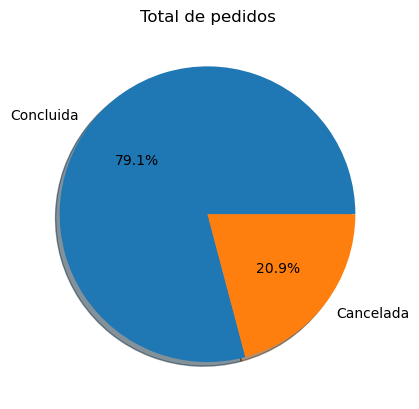

In [6]:
display(info_pedidos_df['Situação'].value_counts())
info_pedidos_df['Situação'].value_counts().plot(kind='pie', shadow=True, autopct='%.1f%%')
plt.title('Total de pedidos')
plt.ylabel('')
plt.show()

In [7]:
medias_pedidos = info_pedidos_df.groupby('Situação').mean()
medias_pedidos = medias_pedidos.round(1)
display(medias_pedidos)
medias_pedidos = medias_pedidos.drop(['Percentual Frete'], axis=1)
medias_pedidos = medias_pedidos.drop(['Valor Total'], axis=1)

print('Média do valor do frete nos pedidos {:.2F} R$ '.format(info_pedidos_df['Valor Frete'].mean()))
print('Média do percentual do frete no valor total {:.2F} R$ '.format(info_pedidos_df['Percentual Frete'].mean()))


,Valor Pedido,Valor Frete,Valor Total,Percentual Frete
Situação,,,,
Cancelada,34.7,14.7,49.4,33.6
Concluida,38.1,11.4,49.5,30.5


Média do valor do frete nos pedidos 12.12 R$ 
Média do percentual do frete no valor total 31.16 R$ 


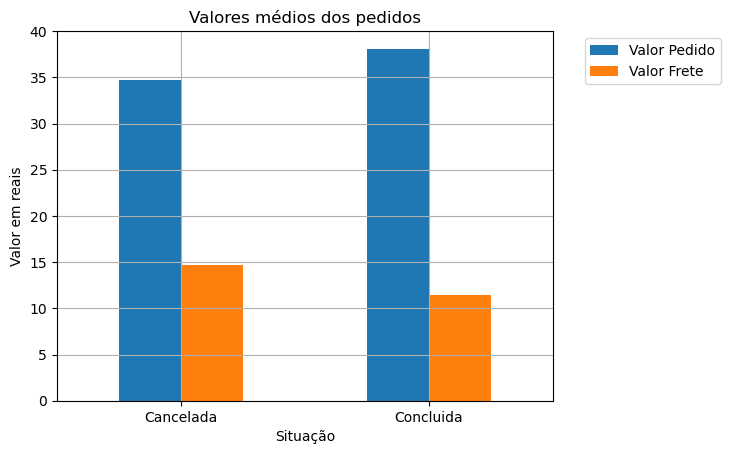

In [8]:
medias_pedidos.plot(kind='bar')
plt.title('Valores médios dos pedidos')
plt.xticks(rotation = 0)
plt.ylabel('Valor em reais')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Situação
Concluida    265
Cancelada     59
Name: count, dtype: int64

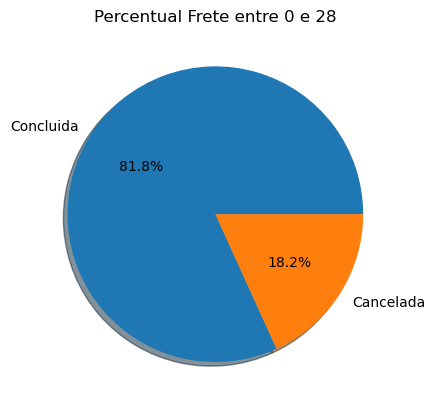

Situação
Concluida    291
Cancelada     87
Name: count, dtype: int64

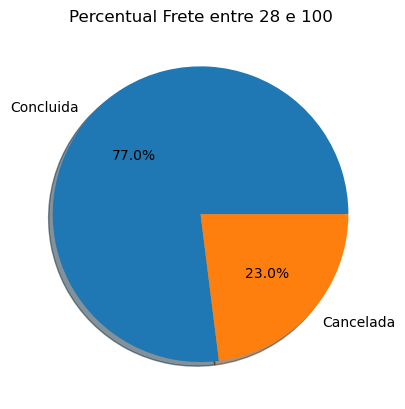

In [9]:
graficos(info_pedidos_df, 'Percentual Frete', 0, 28)
graficos(info_pedidos_df, 'Percentual Frete', 28, 100)

Situação
Concluida    308
Cancelada     76
Name: count, dtype: int64

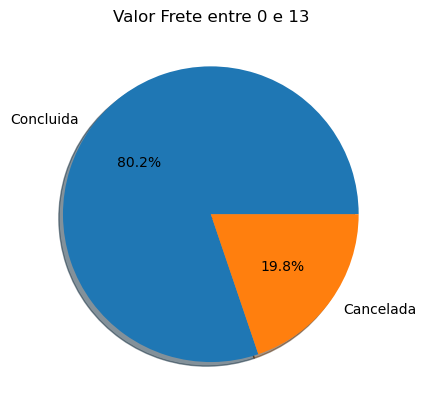

Situação
Concluida    248
Cancelada     70
Name: count, dtype: int64

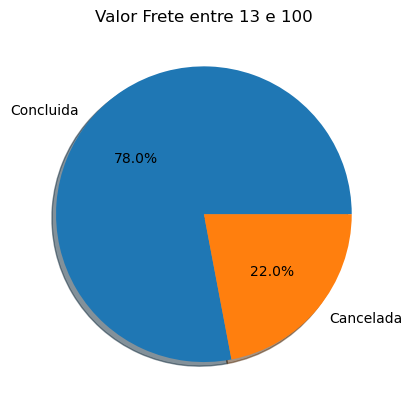

In [10]:
graficos(info_pedidos_df, 'Valor Frete', 0, 13)
graficos(info_pedidos_df, 'Valor Frete', 13, 100)